In [3]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


# return 

In [6]:
# return 
global smoothSleepTime
smoothSleepTime = 0.05
def returnnnnn():
    mypose = rb.AUPose['StandardPose']
    mypose[34] = 105
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=100)
    print('returnnnnn')

Total time 1.25


<Figure size 432x288 with 0 Axes>

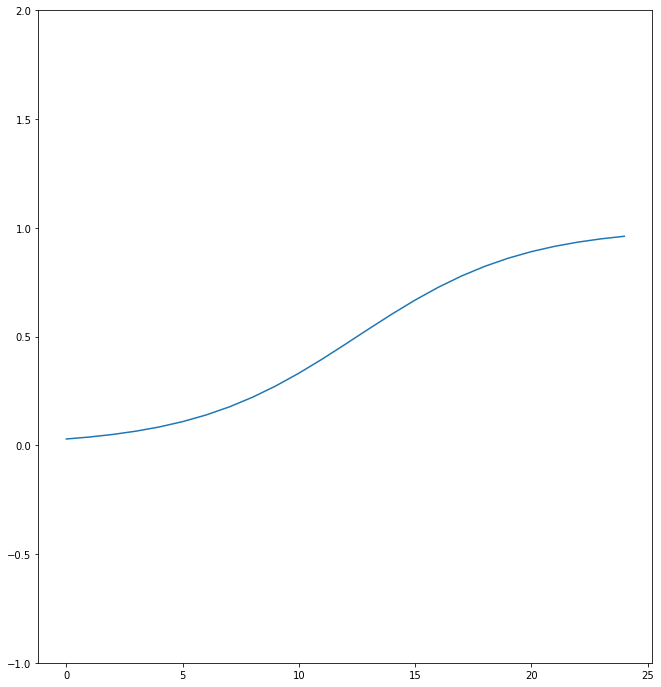

In [20]:
start = 64
end = 250
sleeptime = 0.05
stepNum = 25
sigmoid_factor = 7
print(f'Total time {sleeptime * stepNum}')
mid_steps = []
x = []
y = []

d1 = []
d2 = []

for i in range(stepNum):
    cur = start + (end - start) * sigmoid(sigmoid_factor * (i / stepNum - 0.5))
#     print(sigmoid(sigmoid_factor * (i / stepNum - 0.5)))
#     print(sigmoid_factor * (i / stepNum - 0.5))
    mid_steps.append(cur)
    d1.append(sigmoid_factor * (i / stepNum - 0.5))
    d2.append(sigmoid(sigmoid_factor * (i / stepNum - 0.5)))
    x.append(i)
    
# print(mid_steps)
# print(d1)
# print(d2)

import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=2, wspace=1)
fig = plt.figure(figsize=(11, 12))
p = 0
# axes[p] = plt.subplot(3, 2, p+1)
axes = plt.subplot()
#     axes[p].set_xlim([0, 5])
axes.set_ylim([-1, 2])
# axes.plot(x, d1)
axes.plot(x, d2)

# axes.set_title(f'sigmoid {s}', y=-0.2)